# __Etudes des Amendements du PLFSS 2020-2021__
Analyse des Affaires Sociales,
Equipe LexImpact, Mars 2021
PATH etudes-amendements

## Table des matières
[Introduction](#Introduction) |
[Extraction](#Extraction) |
[Préparation des données](#Préparation-des-données) |
[Analyse](#Analyse) |
[Conclusion](#Conclusion)

## [I_Introduction](#I_Introduction)

## [II_Extraction](#II_Extraction)

__Méthode :__  À partir de l'outil "Les tricoteuses" d'Emmanuel Raviart, on obtient l'ensemble des textes (i.e. dispositif et exposé sommaire) des amendements se référant au PLFSS 2020-2021.

__Output :__ Ils sont sauvegardés dans un fichier .csv situé ici:

'https://raw.githubusercontent.com/leximpact/donnees-extraites-assemblee/main/textes_amendements_nouveaux_articles_plfss_2020-2021.csv'

## [III_Préparation des données](#III_Préparation-des-données)

[III.1_Import des données](#III.0_Import-des-données) |
[III.2_NLP Process](#NLP-Process) |
[III.3_Sauvegarde](#Sauvegarde)

### [III.1_Import des données](#III.1_Import-des-données)

__Code :__ On importe le fichier précédent et on le range dans un tableau dont on peut voir les 5 premières lignes ci-dessous:

In [1]:
import pandas as pd
amdts = pd.read_csv('https://raw.githubusercontent.com/leximpact/donnees-extraites-assemblee/main/textes_amendements_nouveaux_articles_plfss_2020-2021.csv')
amdts.head(5)

#On regroupe dans un même texte chaque dispositif et son exposé sommaire
amdts['texte'] = amdts['dispositif'] + amdts['exposeSommaire'] 

print("Nous avons alors un nombre total de : ", len(amdts), "amendements")

Nous avons alors un nombre total de :  4797 amendements


### [III.2_NLP Process](#III.2_NLP-Process)

__Méthode :__ Nous allons ensuite appliquer des méthodes de Natural Language Processing pour pouvoir étudier ces textes. Le NLP est la science de l'analyse de texte.
Pour pouvoir faire des opérations mathématiques sur le texte, il faut d'abord le "pré-processer" de la façon suivante:
- __tokenization__ : séparer en mots distincts dits __TOKENS__
- __part-of-speech tagging__ : attribuer à chaque mot son type (nom, verbe, etc...)
- __lemmatization__ : réduire chaque mot à sa racine. Cela permet de traiter comme un seul mot toutes les formes conjuguées d'un verbe, ou un mot et son pluriel.
- __casing and punctuation__ : passer tous les mots en minuscule et retirer toute ponctuation
- __stop-word removal__ : supprimer les mots inutiles ('le', 'la', 'les', 'un', 'des',...)


__Code :__

In [2]:
import spacy #!python -m spacy download fr_core_news_sm > /dev/null
#Choix du package de langue française
nlp = spacy.load("fr_core_news_sm") #python -m spacy download fr_core_news_sm #Moins précis mais rapide
#nlp = spacy.load("fr_core_news_md") #python -m spacy download fr_core_news_md 
#nlp = spacy.load("fr_core_news_lg") #python -m spacy download fr_core_news_lg
#nlp = spacy.load("fr_dep_news_trf") #python -m spacy download fr_dep_news_trf #Précis mais long

# LIGNE À DÉ-COMMENTER SI ON VEUT FAIRE LE CALCUL SUR UNE PETITE PARTIE DU CORPUS
#amdts = amdts[0:6]

lemmatized_amdts = []
amdt = []
for amdt in amdts['texte']:
    lemmatized_amdt=[]
    token = []
    for token in nlp(amdt):
        lemmatized_amdt.append(token.lemma_)
        #print(token.text,token.lemma_)
    lemmatized_amdts.append(lemmatized_amdt)

print('AVANT:', amdts['texte'][4])    
print('APRES:', lemmatized_amdts[4])

AVANT: Le premier alinéa de l’article L. 521‑1 du code de la sécurité sociale est complété par une phrase ainsi rédigée :« Elles sont universelles. »Pendant plus de cinquante ans, notre politique familiale a reposé sur le principe de l’universalité. Cela signifie qu’elle s’adressait à tous les Français, sans distinction sociale. Elle reposait sur l’idée que chaque enfant à naître est une chance et une richesse pour la France, pour son avenir, quel que soient les ressources dont disposent les parents.Pour mettre en place ce principe d’universalité, la politique familiale appelle des outils dits de redistribution horizontale, c’est-à-dire des mécanismes de solidarité des familles sans enfant envers les familles avec enfants, pour que, quel que soit les revenus des parents, la naissance d’un enfant n’ait pas pour effet de porter atteinte à leur niveau de vie.Or, ce principe d’universalité a été mis à mal sous le précédent quinquennat, notamment à travers la modulation des allocations fami

In [3]:
## Removing punctuation AND Casing
#( Casing: Est-ce vraiment utile ? Est-ce qu'on ne va pas perdre les Acronymes de vue ?)
amdts_clean = []
for amdt in lemmatized_amdts:
    amdts_clean.append([ word.lower() for word in amdt if word.isalpha()])
print(amdts_clean[4])
print(len(amdts_clean))

['le', 'premier', 'alinéa', 'de', 'article', 'de', 'code', 'de', 'le', 'sécurité', 'social', 'être', 'compléter', 'par', 'un', 'phrase', 'ainsi', 'rédiger', 'lui', 'être', 'universel', 'pendant', 'plus', 'de', 'cinquante', 'an', 'notre', 'politique', 'familial', 'avoir', 'reposer', 'sur', 'le', 'principe', 'de', 'universalité', 'cela', 'signifier', 'lui', 'adresser', 'à', 'tout', 'le', 'français', 'sans', 'distinction', 'social', 'lui', 'reposer', 'sur', 'idée', 'que', 'chaque', 'enfant', 'à', 'naître', 'être', 'un', 'chance', 'et', 'un', 'richesse', 'pour', 'le', 'france', 'pour', 'son', 'avenir', 'quel', 'que', 'être', 'le', 'ressource', 'dont', 'disposer', 'le', 'parent', 'pour', 'mettre', 'en', 'place', 'ce', 'principe', 'universalité', 'le', 'politique', 'familial', 'appeler', 'de', 'outil', 'dire', 'de', 'redistribution', 'horizontal', 'être', 'à', 'dire', 'un', 'mécanisme', 'de', 'solidarité', 'de', 'famille', 'sans', 'enfant', 'envers', 'le', 'famille', 'avec', 'enfant', 'pour'

Pour choisir nos mots inutiles, on décide de faire une liste à partir de trois sources:
- le package python __nltk__
- le package python __spacy__
- et __notre propore fichier Excel__ que nous complétons avec les mots qui nous semblent inintéressants.

Ce fichier Excel se situe ici:
https://github.com/leximpact/etudes-amendements/blob/main/notebook/Added_stop_words.csv

In [4]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

#STOP-WORDS
#On importe les 'stop-words' du langage français depuis NLTK
from nltk.corpus import stopwords 
stop_words = stopwords.words("french")
#print(stop_words)

#On importe les 'stop-words' du langage français depuis SPACY
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
#print(fr_stop)
for word in fr_stop:
        stop_words.append(word)
del(word)
stop_words = list(stop_words)

#On importe nos propres stopwords depuis le fichier CSV
SW = pd.read_csv('Added_stop_words.csv')
SW = list(SW.StopWords)
final_SW = stop_words+ SW

#On met tout en minuscule et on enlève les éventuels espaces (avant et après chaque mot)
final_SW = [ word.lower().strip('') for word in final_SW]
      
#On enlève les doublons
df = pd.DataFrame({"StopWords" : final_SW})
final_SW = df.drop_duplicates()
final_SW = list(final_SW.StopWords)
print("LA LISTE FINALE DE NOS MOTS 'INUTILES' : \n \n", final_SW ,'\n')

#STOP-WORD REMOVAL
print("UN AMENDEMENT AVANT LA SUPPRESSION DE CES MOTS : \n \n", amdts_clean[4], "\n")
tokenized = []
for amdt in amdts_clean:
    tokenized.append([ word.strip(' ') for word in amdt if word not in final_SW])
print("LE MEME AMENDEMENT APRÈS LA SUPPRESSION DE CES MOTS : \n", tokenized[4], "\n")

LA LISTE FINALE DE NOS MOTS 'INUTILES' : 
 
 ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'o

### [III.3_Sauvegarde](#III.3_Sauvegarde)

__Output :__ On va ensuite sauvegarder ces amendements "pré-processés" dans trois fichiers, dont deux en '.csv', avec deux formats différents. Pour ces deux-là, chaque ligne représentera un amendement, mais:

- dans le 1er fichier on n'a qu'une colonne, avec la liste des __TOKENS__ de chaque amendement: https://github.com/leximpact/etudes-amendements/tree/main/notebook/data_csv/amdts_cleaned_liste.csv

- dans le 2e fichier on a une colonne par __TOKEN__ pour chaque amendement:
https://github.com/leximpact/etudes-amendements/tree/main/notebook/data_csv/amdts_cleaned.csv

Ces données sont consultables directement, mais sont quelque peu indigestes. Le troisième format d'enregistrement (avec pickle) n'est pas consultable hors code. Ces fichiers nous serviront surtout de base d'import pour la suite des analyses.

__Limites :__ Une question se pose ici: est-ce que l'on veut supprimer les lignes en double (i.e. les amendements qui ont exactement les mêmes tokens) ?
Cela permettrait de ne pas donner trop d'importance à un même amendement déposé plusieurs fois, mais on risque aussi de ne pas voir des amendements réellement différents mais qui traitent d'un même sujet.
Pour l'instant le choix a été fait de ne pas supprimer les doublons. Cela peut se changer en un clic sur le code ci-dessous.

In [5]:
#On enregistre le corpus d'amendements lemmatizé et sans stopwords : FORMAT 1
df1=[]
for i in range(len(tokenized)):  
    d = ( ' '.join(list(tokenized[i])) )
    df1.append(d)
    
df1 = pd.DataFrame(df1).astype(str)
#df1.drop_duplicates() #Enlever les doublons
df1.rename(columns = {list(df1)[0]: 'Amdt'}, inplace = True)
print("Un aperçu du premier format : ", df1.head(), "\n \n")
df1.to_csv('data_csv/amdts_cleaned_liste.csv') #Une seule liste de mots par amdt

#On enregistre le corpus d'amendements lemmatizé et sans stopwords : FORMAT 2
df = pd.DataFrame(data = tokenized ).astype(str)
#Enlever les doublons
#L1 = len(df)
#df.drop_duplicates()
#print("Nombre d'amendements en double retirés : ", L1-len(df), "\n")

df = df.fillna('') 
print("Un aperçu du deuxième format : ", df.head(), "\n \n")
#df = df.
df.to_csv('data_csv/amdts_cleaned.csv')  #Chaque ligne est un amendement, chaque colonne est un mot
amdts_cleaned = tokenized #pour la suite du code

#Sauvegarde des amendements sous forme de liste de : listes de tokens : FORMAT 3
import pickle
pickle.dump( tokenized, open( "data_csv/amdts_list.pickle", "wb" ) )

Un aperçu du premier format :                                                  Amdt
0  insérer v bis entreprise salarié employeur aut...
1  sécurité social attribuer insérer verser sécur...
2  compléter remettre parlement échéance période ...
3  insérer dudit limiter possibilité organiser dé...
4  sécurité social compléter rédiger universel an... 
 

Un aperçu du deuxième format :          0         1          2            3          4                5     \
0    insérer         v        bis   entreprise    salarié        employeur   
1   sécurité    social  attribuer      insérer     verser         sécurité   
2  compléter  remettre  parlement     échéance    période  expérimentation   
3    insérer     dudit    limiter  possibilité  organiser       délégation   
4   sécurité    social  compléter      rédiger  universel               an   

         6          7                8          9     ...  1417  1418  1419  \
0   autoriser  attribuer             fois         an  ...  None  No

## [IV_Analyse](#IV_Analyse)

[IV.1_Mots fréquent](#IV.1_Mots-fréquents) |
[IV.2_Analyse relative](#IV.2_Analyse-relative) |
[IV.3_Analyse de topics](#IV.3_Analyse-de-topics)

### [IV.1_Mots fréquents](#IV.1_Mots-fréquents) 

#### [IV.1.1_Recherche des mots fréquents](#IV.1.1_Recherche-des-mots-fréquents) 

__Input :__ Pour la suite des analyses, on charge directement le fichier amdts_list.pickle, qui contient nos amendements "mis en forme"

__Méthode :__ On commence par regarder les mots les plus fréquents dans l'ensemble du corpus (i.e. l'ensemble des mots des amendements). Le script ci-dessous va nous permettre d'extraire les mots les plus importants et le nombre de fois où ils sont cités.
On décide d'extraire les __N__ mots les plus fréquents.
__Vous pouvez changer ce nombre directement dans le code ci-dessous__, et exécuter la cellule (__run__) pour générer automatiquement un fichier .csv avec ces mots et leur nombre total d'occurrences par amendement.

Les fichiers ainsi générés seront disponibles ici:
https://github.com/leximpact/etudes-amendements/tree/main/notebook/data_csv/ 
et s'appelleront : most_common __N__ words_per_amdt.csv

__Code :__

In [6]:
N = 10 #Changez ce nombre pour générer le fichier de votre choix

#Chargement des données
import pandas as pd
amdts = pd.read_csv('https://raw.githubusercontent.com/leximpact/donnees-extraites-assemblee/main/textes_amendements_nouveaux_articles_plfss_2020-2021.csv')

import pickle
amdts_list = pickle.load(open("data_csv/amdts_list.pickle", "rb"))

#Counting
from collections import Counter
def most_common_words(amdts_list, N):
    freq = []
    words = []
    amdt = []
    for amdt in amdts_list:
        bow = Counter(amdt) 
        #print(bow.most_common(N))
        words.append([bow.most_common(N)[i][0] for i in range(len(bow.most_common(N)))])
        freq.append(bow.most_common(N)) 
    return pd.DataFrame(freq), words #On ne garde que les N mots les plus utilisés pour chaque amendement

freq, words = most_common_words(amdts_list, N)

#Mise en forme 
freq_index = ['Mot Nº{i}'.format(i = j+1) for j in range(N)]
freq.columns = freq_index

#Nom des lignes (amendements)

corpus_index = amdts['uid'].tolist()
freq.index = corpus_index

#On sauvegarde cette donnée dans un fichier .csv dont les lignes sont les amdts 
#et les colonnes sont (les mots et leur nombre d'occurrences)
#Nom des colonnes (mots)
freq.to_csv('data_csv/most_common_{nb}_words_per_amdt.csv'.format(nb = N))

import pickle
pickle.dump( freq, open( "data_csv/freq.pickle", "wb" ) )

print("Ci-dessous un exemple des {N} mots les plus utilisés sur les 5 premiers amendements: \n \n ".format(N = N), freq.head())

Ci-dessous un exemple des 10 mots les plus utilisés sur les 5 premiers amendements: 
 
                                                  Mot Nº1             Mot Nº2  \
AMANR5L15PO420120B2296P0D1N000001          (salarié, 6)     (entreprise, 5)   
AMANR5L15PO420120B2296P0D1N000002       (naissance, 15)        (enfant, 15)   
AMANR5L15PO420120B2296P0D1N000005  (expérimentation, 5)        (service, 3)   
AMANR5L15PO420120B2296P0D1N000008          (social, 10)  (établissement, 7)   
AMANR5L15PO420120B2296P0D1N000010         (familial, 7)      (politique, 5)   

                                                Mot Nº3        Mot Nº4  \
AMANR5L15PO420120B2296P0D1N000001        (employeur, 3)     (prime, 3)   
AMANR5L15PO420120B2296P0D1N000002            (prime, 9)    (social, 6)   
AMANR5L15PO420120B2296P0D1N000005  (contemporanéité, 2)     (impôt, 2)   
AMANR5L15PO420120B2296P0D1N000008          (service, 7)      (acte, 4)   
AMANR5L15PO420120B2296P0D1N000010           (social, 4)  (principe



__Méthode :__ Pour plus de lisibilité, on met ces données sous forme de graphique. On va d'abord chercher LE mot le plus fréquent dans chaque amendement: ce sera le __MOT-CLEF__ de cet amendement.
Ensuite on regarde quels sont les Mots-clefs les plus fréquents. Ici on décide de regarder les __N__ mots-clefs qui reviennent le plus souvent.
Comme précédemment, __vous pouvez changer la valeur de N__ dans le code ci-dessous, et exécuter la cellule: cela génèrera automatiquement un fichier .png (dans le dossier https://github.com/leximpact/etudes-amendements/tree/main/notebook/graphs).

__Code :__

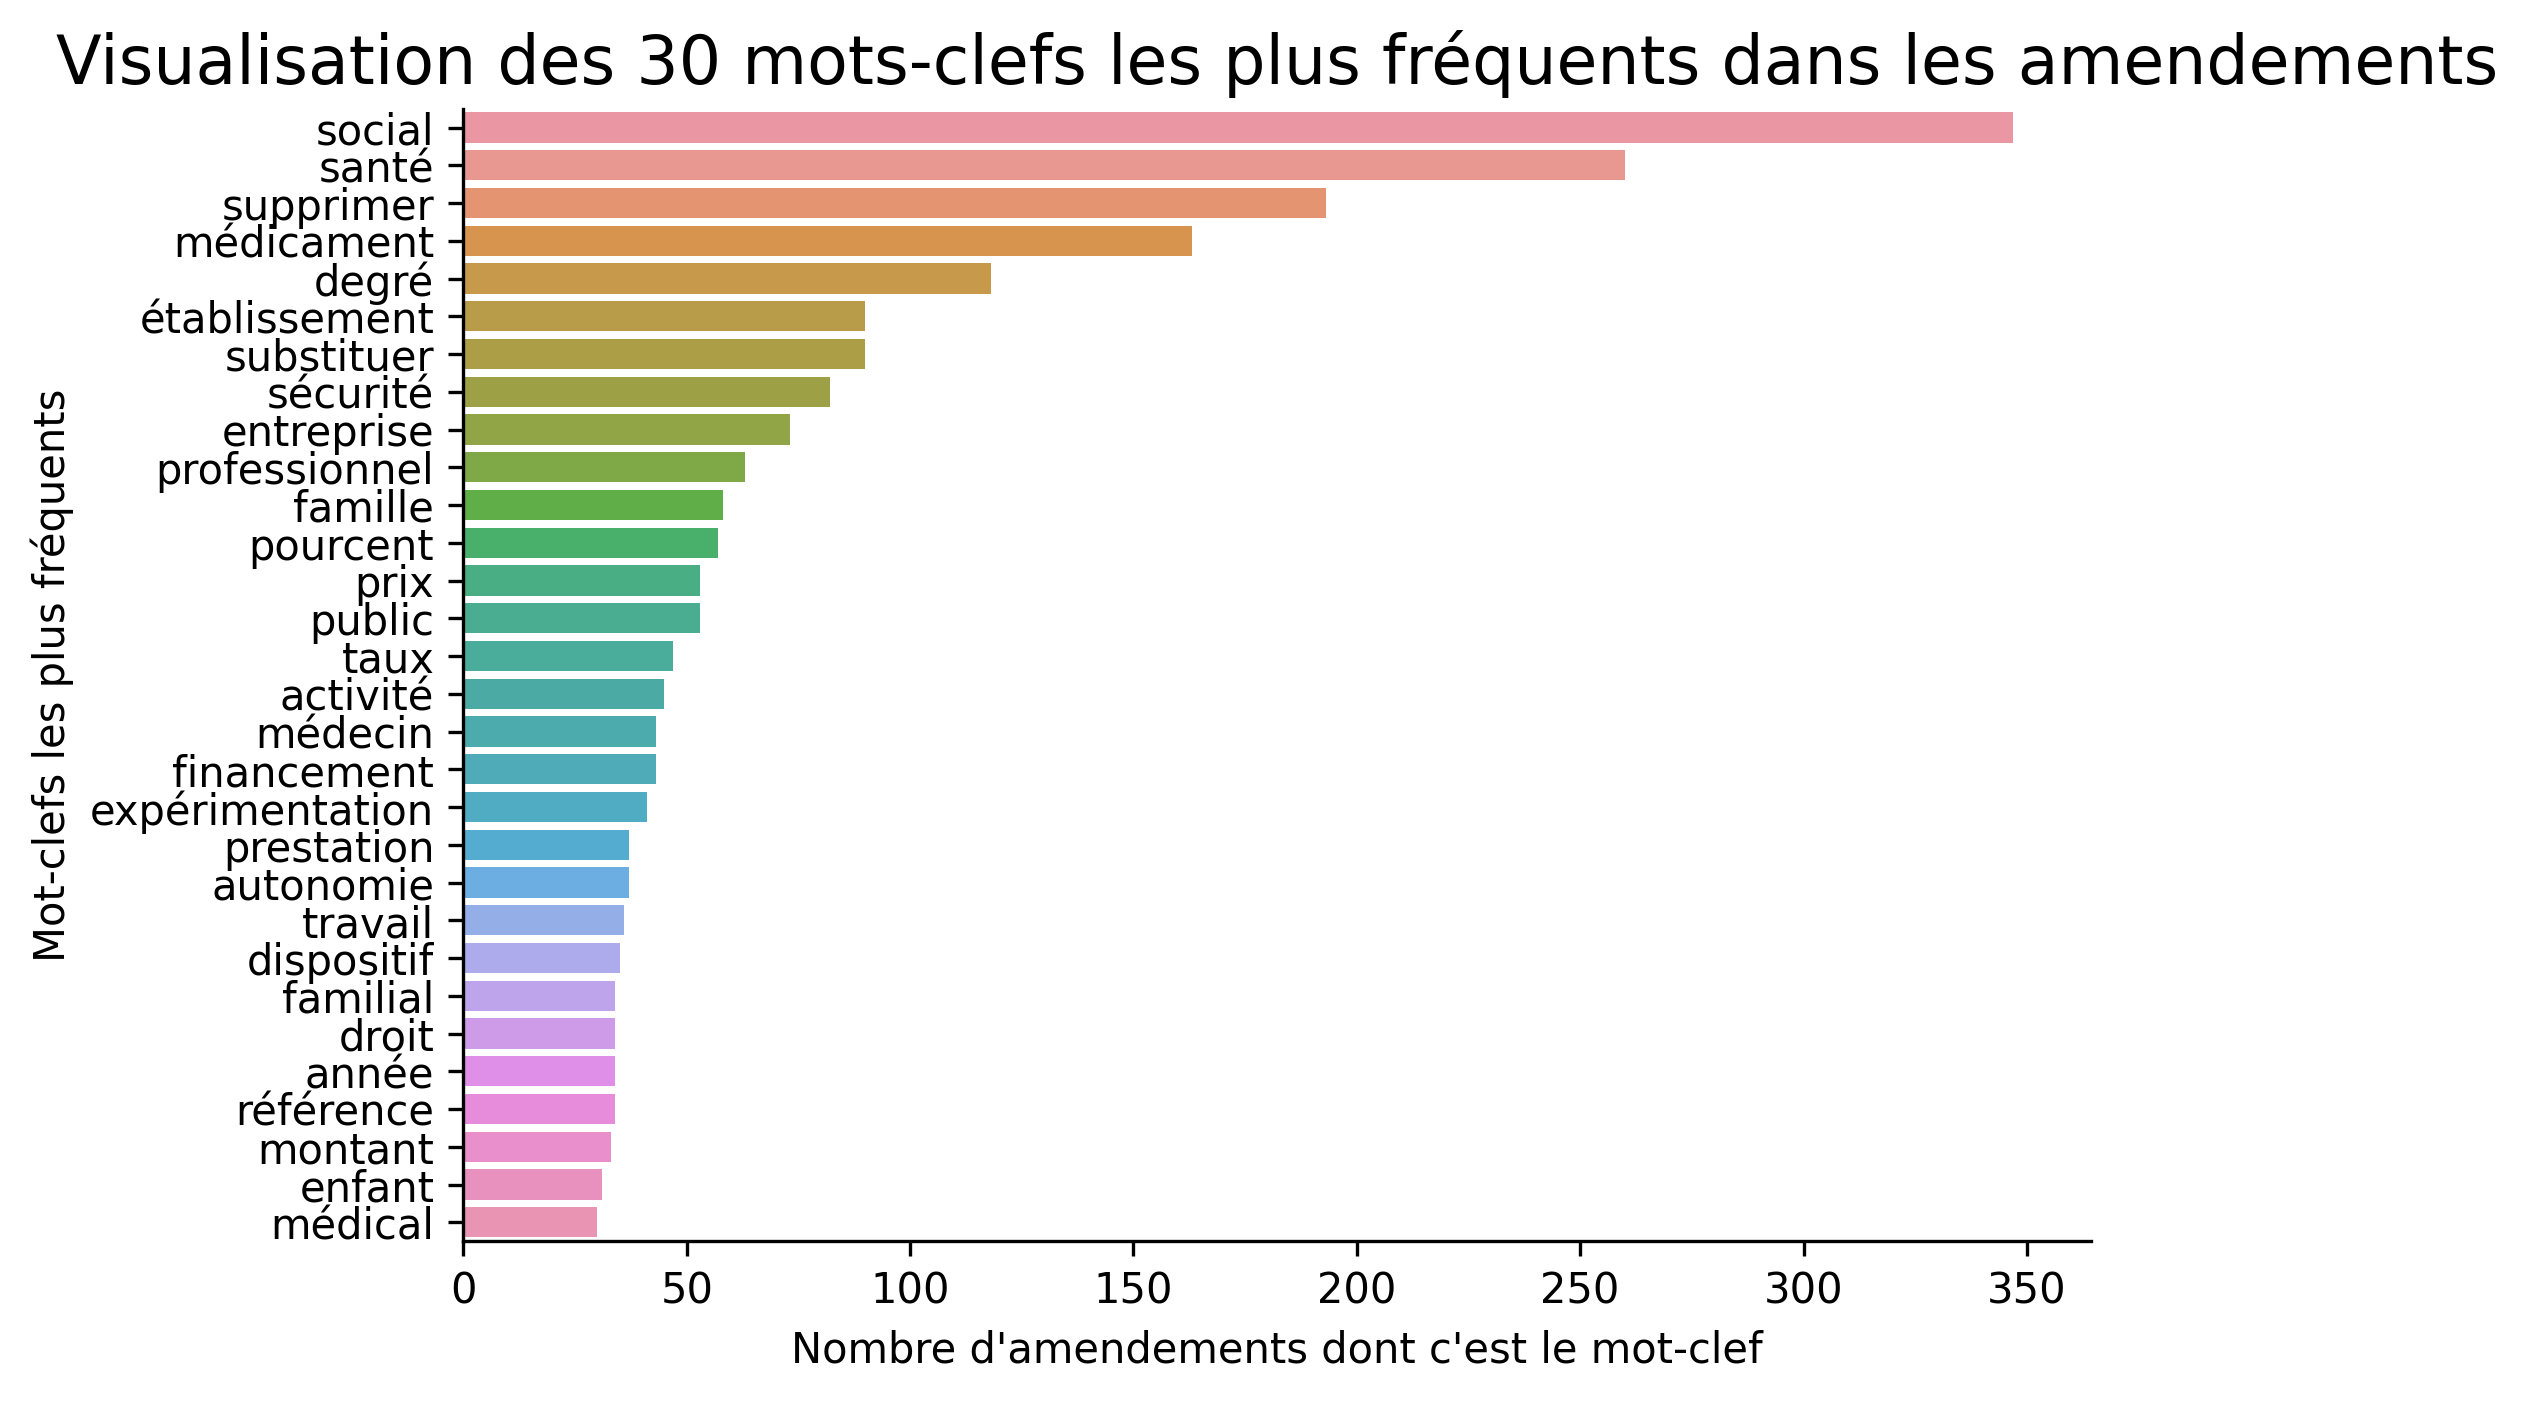

In [7]:
#On décide de regarder les N mots qui sont le plus fréquemment en Nº1 des amendements
N = 30 # À modifier ici

# Calculs
from collections import Counter
mots_clefs = [ words[i][0] for i in range(len(words))]
bow = Counter(mots_clefs)
df = pd.DataFrame( bow.most_common(N) )
df.columns = ["Word", 'Count']

# Mise en forme graphique
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,5), dpi = 300, facecolor = 'white')
sns.barplot(data = df, x = 'Count', y = 'Word')
#Styling
sns.set_context('paper', font_scale = 1, rc = {'font.size': 10})
sns.despine(top = True, right = True)
plt.rc('axes', labelsize = 12) 
plt.rc('axes', titlesize = 16) 
plt.xlabel("Nombre d'amendements dont c'est le mot-clef")
plt.ylabel("Mot-clefs les plus fréquents")
plt.title("Visualisation des {N} mots-clefs les plus fréquents dans les amendements".format(N=N))
#Save and show
plt.savefig('graphs/{N}_Mots_clefs_les_plus_fréquents.png'.format(N=N), bbox_inches = 'tight')
plt.show()

#### [IV.1.2_Nuage de mots](#IV.1.2_Nuage-de-mots) 

__Méthode :__ On fait un nuage de mots, qui représente __les expressions (de 1 à 2 mots) les plus fréquentes__ avec une taille proportionnelle à leur occurrence dans le corpus d'amendements. On a ici une représentation des TOKENS, donc certains mots sont réduits à leur racine, d'où leur orthographe parfois... étonnante.

Ce nuage de mots est disponible ici : https://github.com/leximpact/etudes-amendements/tree/main/notebook/graphs/Nuage_de_mots_PLFSS.png

In [8]:
import pickle
import pandas as pd
from urllib.request import urlopen
from collections import Counter
from wordcloud import WordCloud

#Load data
amdt_new = pd.read_csv('data_csv/amdts_cleaned_liste.csv')
       
def build_word_cloud(amdt_new):
    # Join the different processed titles together.  
    long_string = ' '.join(list(amdt_new['Amdt'].values))
    # Create a WordCloud object (analyzing up to bigrams)
    wordcloud = WordCloud(background_color="white", width=1000, height=800, max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    return wordcloud

cloud = build_word_cloud(amdt_new)
cloud.to_file('graphs/Nuage_de_mots_PLFSS.png') #Ce wordcloud analyse les "expressions de 1 ou 2 mots" les plus utilisées

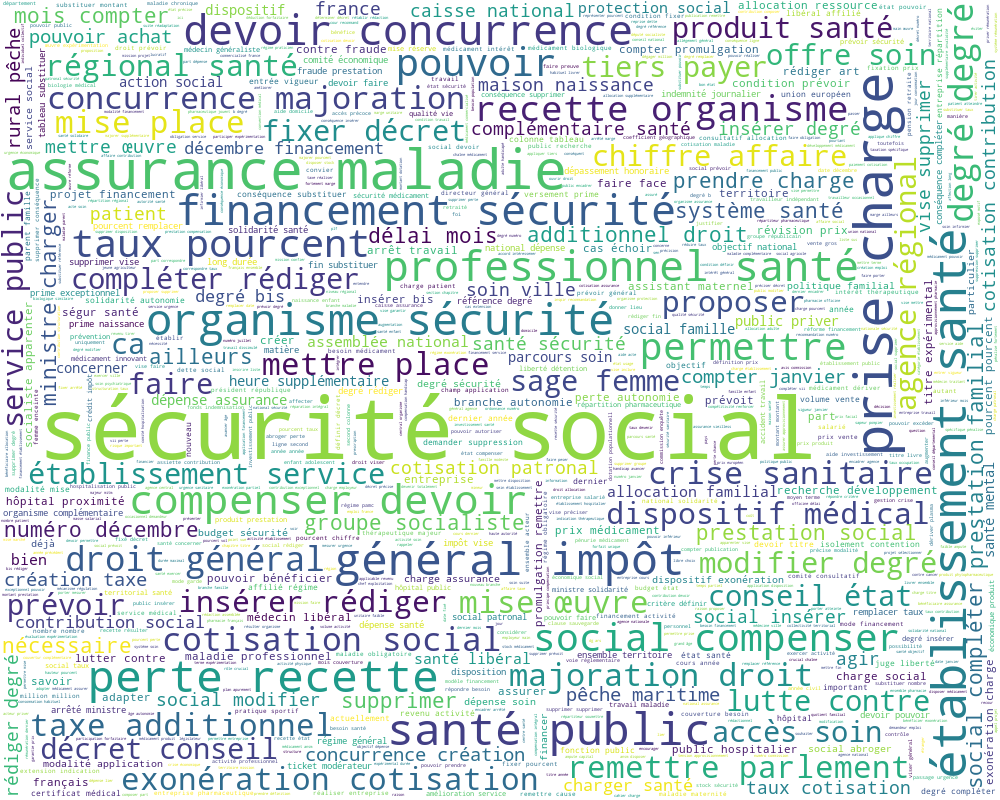

In [17]:
from IPython.display import Image
Image("graphs/Nuage_de_mots_PLFSS.png")

### [IV.2_Analyse relative](#IV.2_Analyse-relative)

__Méthode :__ Puisque tous les amendements traitent de sujets similaires, on va s'intéresser à leur __spécificité__ par rapport aux autres amendements. Cela permettra de voir ceux qui ont un __but__ ou un __domaine d'application spécifique__ .

Pour cela on utilise la méthode "Term Frequency - Inverse Document Frequency", qui consiste à regarder la fréquence d'un mot dans un amendement par rapport à la fréquence de ce mot dans l'ensemble du corpus (i.e. tous les amendements). Ces mots ne seront pas les plus fréquents, mais __les plus importants (relativement)__ .

PS: Nous sauvegardons ces mots __importants__ dans un fichier .csv, qui n'a vocation à être consulté uniquement si l'on veut se plonger dans les détails. Ce fichier est ici :
https://github.com/leximpact/etudes-amendements/tree/main/notebook/data_csv/mots_importants_pour_chaque_amdt.csv


__Code :__

In [19]:
import sklearn
import pickle

#Chargement des données
import pandas as pd
import pickle
amdts_list = pickle.load(open("data_csv/amdts_list.pickle", "rb"))

#Mise sous forme 'corpus' (une liste de tous les textes)
corpus = []
for amdt1 in amdts_list:
    temp = ' '.join(amdt1)
    corpus.append(temp)
    temp = ''
    
#Vectorization - Term Frequency in Global Corpus
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(corpus)

#Sauvegarde dans un fichier csv
with open("data_csv/corpus.txt", "wb") as fp:
    pickle.dump(corpus, fp)
#print(corpus[2:4])

#Features: l'ensemble des mots dans le corpus (après nettoyage)
feature_names = vectorizer.get_feature_names()
#print(feature_names[:10])

#IDF - Inverse Document Frequencies
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize and fit TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None)
tf_idf_scores = vectorizer.fit_transform(corpus)

#Résultats sous forme matricielle
df_tf_idf = pd.DataFrame(tf_idf_scores.todense())
df_tf_idf.columns =  feature_names
df_tf_idf.index = corpus_index
#print("Matrice de densité: poids de chaque mot dans chacun des amendements", df_tf_idf.head(), "\n \n")

#On analyse pour chaque amendement les X mots les plus importants (par rapport au reste du corpus)
outstanding_words = []
for i in range(len(df_tf_idf)): #On parcourt les amendements
    mots = []
    poids = []
    mots_sorted = []
    for mot in df_tf_idf :
        if df_tf_idf[mot].iloc[i] > 0 :
            mots.append(str(mot)) # (mot, poids)
            poids.append(df_tf_idf[mot].iloc[i]) # (mot, poids)
    mots_sorted = [x for _,x in sorted(zip(poids,mots))]
    #print(mots_sorted)
    outstanding_words.append(mots_sorted)       
     
del(df)
df = pd.DataFrame(outstanding_words)
df.index = corpus_index  
print("Un extrait du fichier des mots importants : \n", df.head() , '\n')
#Sauvegarde dans un fichier csv
df.to_csv('data_csv/mots_importants_pour_chaque_amdt.csv')

Un extrait du fichier des mots importants : 
                                         0        1          2            3    \
AMANR5L15PO420120B2296P0D1N000001  sécurité     vise    insérer      prévoir   
AMANR5L15PO420120B2296P0D1N000002   pouvoir    santé       vise      insérer   
AMANR5L15PO420120B2296P0D1N000005    social  pouvoir  permettre      prévoir   
AMANR5L15PO420120B2296P0D1N000008    devoir  insérer    rédiger      prévoir   
AMANR5L15PO420120B2296P0D1N000010      vise    faire    rédiger  financement   

                                          4            5            6    \
AMANR5L15PO420120B2296P0D1N000001   compléter         état    organisme   
AMANR5L15PO420120B2296P0D1N000002      charge       mettre  disposition   
AMANR5L15PO420120B2296P0D1N000005  dispositif    compléter      général   
AMANR5L15PO420120B2296P0D1N000008      mettre  disposition    sanitaire   
AMANR5L15PO420120B2296P0D1N000010   compléter  conséquence           an   

                      

__Méthode :__ Afin d'avoir un résultat lisible, nous génénerons un fichier .csv qui contient, pour chaque amendement, les 3 mots les plus fréquents et les 3 mots les importants. Cette 'combinaison' de 6 mots sera notre 'description minimale essentielle' d'un amendement.

Pour l'analyse, nous regroupons les amendements qui ont la même description essentielle (i.e. sont décrits par la même combinaison de 6 mots), et nous classons les combinaisons par ordre décroissant :
https://github.com/leximpact/etudes-amendements/tree/main/notebook/data_csv/comparatif_3_mots_specifiques_et_relatifs_pour_chaque_amdts.csv

Un résumé des 20 premières lignes de ce fichier est disponible ici :

In [26]:
N = 3

#Load and transform data
import pandas as pd
import pickle
del(freq)
freq = pickle.load(open("data_csv/freq.pickle", "rb"))
#print(freq.head())
del(df)
df = pd.read_csv('data_csv/mots_importants_pour_chaque_amdt.csv', low_memory=False)
#print(df.head())
df2 = []
for i in range(len(df)):
    mots_spec = []
    mots_rel = []
    for j in range(N):
        if freq.iloc[i][j] != None :
            mots_spec.append( freq.iloc[i][j][0] )
            mots_rel.append( df.iloc[i][j+1] )
    df2.append( mots_spec + mots_rel ) # N mots relatifs

#Mise en forme 
df2 = pd.DataFrame(df2)
spec_index = ['Mot Fréquent{i}'.format(i = j+1) for j in range(N)]
rel_index = ['Mot Important{i}'.format(i = j+1) for j in range(N)]
df2.columns = [ spec_index + rel_index]
df2.index = corpus_index  
#print(df2.head())

#Pour plus de lisibilité, on regroupe les cas similaires
final = df2.value_counts()
print("Descriptions minimales essentielles les plus fréquentes, et le nombre d'amendements concernés: \n \n", final.head(20))

#Sauvegarde dans un fichier csv
final.to_csv('data_csv/comparatif_{nb}_mots_specifiques_et_relatifs_pour_chaque_amdts.csv'.format(nb = N))


Descriptions minimales essentielles les plus fréquentes, et le nombre d'amendements concernés: 
 
 (Mot Fréquent1,)  (Mot Fréquent2,)  (Mot Fréquent3,)  (Mot Important1,)  (Mot Important2,)  (Mot Important3,)
professionnel     santé             sécurité          devoir             vise               financement          27
médicament        pourcent          taux              santé              devoir             permettre            25
projet            aide              investissement    pouvoir            permettre          public               18
convention        actuel            demander          permettre          supprimer          an                   15
répartition       médicament        million           droit              maladie            général              14
degré             charge            urgence           pouvoir            santé              vise                 14
offre             spécialité        soin              pouvoir            insérer            met

__CONCLUSION :__ 


Après analyse, il semble que les catégories les plus importantes d'amendements parlent de :

- 1 : financement de la santé et de la sécurité sociale
- 2 : des médicaments et de leur accessibilité
- 3 : de l'investissement public dans la santé
- 4 : ??
- 5 : de la répartition des médicaments
- ...
______________________________________________________________________________________________________________________

###  [IV.3_Analyse de topics](#IV.3_Analyse-de-topics)

__Input :__

__Méthode :__ Afin d'étudier les __TOPICS__ (domaines ou sujets) d'intérêt du corpus, nous allons effectuer une LDA (__Latent Dirichlet Allocation__). Ce modèle génératif probabiliste permet de regrouper des observations en ensembles définis par des similarités de données.
Plus d'infos: https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

L'idée est de dire que chaque amendement est un mélange d'un petit nombre de sujets (topics) et que chaque mot de l'amendement a une probabilité plus ou moins forte d'appartenir à chacun des sujets. En fonction de ses mots, __chaque amendement sera ensuite classé parmis les sujets que nous aurons définis__.

_Par exemple, l'amendement 18 traitera à 5% du Topic 1, 80% du Topic 3 et 15% du Topic 8._

__Code :__ Nous commençons par rechercher le __nombre de Topics optimal__, c'est-à-dire le nombre de sujets différents qui permettre de classifier au mieux les amendements.

In [70]:
n_topics = [3, 4, 5] #On essaye différents nombres de topics : ici 3, 4 et 5

#Load data
import pandas as pd
amdt = pd.read_csv('data_csv/amdts_cleaned_liste.csv')
#Loading specific modules
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

# Initialization and training
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(amdt["Amdt"]) #Corpus is preprocessed
 
# Define Search Param
search_params = {'n_components': n_topics,
                'learning_decay': [.5], # [.5, .7, .9]
                'max_iter' : [10],
                'learning_method':['online'],
                'n_jobs':[-1]}

# Init the Model
lda = LatentDirichletAllocation(n_jobs = -1) # n_jobs = -1 to use all CPU core

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search (on entraîne le modèle sur nos datas)
model.fit(data_vectorized) 

GridSearchCV(estimator=LatentDirichletAllocation(n_jobs=-1),
             param_grid={'learning_decay': [0.5], 'learning_method': ['online'],
                         'max_iter': [10], 'n_components': [3, 4, 5],
                         'n_jobs': [-1]})

In [72]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Nombre optimal de topics: ", model.best_params_.get('n_components'))

# Log Likelihood Score
print("Log Likelihood : score à maximiser: ", model.best_score_)

# Perplexity
print("Model Perplexity : score à minimiser: ", best_lda_model.perplexity(data_vectorized))

#Pour les détails:
#model.cv_results_

Nombre optimal de topics:  3
Log Likelihood : score à maximiser:  -704936.1724101255
Model Perplexity : score à minimiser:  1315.075068317581


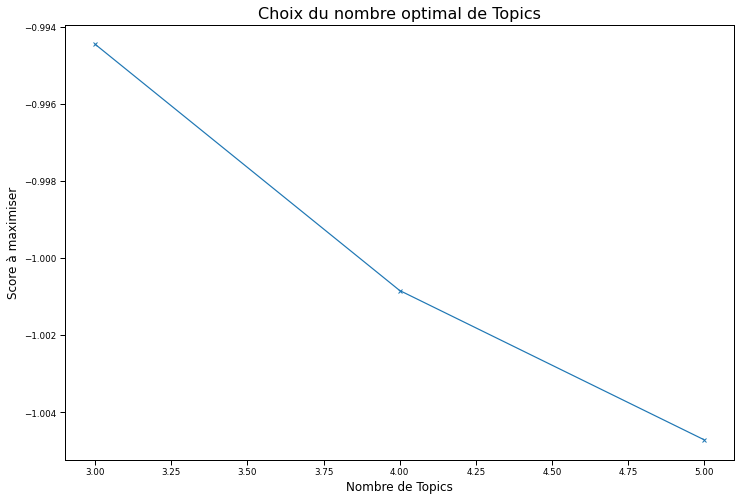

In [102]:
# Get Log Likelyhoods from Grid Search Output
log_likelyhoods = []
for i in range(len(n_topics)):
    log = [round(model.cv_results_.get('mean_test_score')[i])] 
    log_likelyhoods.append(log)
log_likelyhoods = log_likelyhoods/(-1*np.mean(log_likelyhoods))
#log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods, marker='x')

plt.title("Choix du nombre optimal de Topics")
plt.xlabel("Nombre de Topics")
plt.ylabel("Score à maximiser")
# Save figure
plt.savefig('graphs/Optimisation_nombre_topics.png'.format(N=N), bbox_inches = 'tight')
plt.show()

__Méthode :__ Une fois le nombre optimal de topics trouvé, nous allons étudier la répartition des différents amendements de notre corpus parmi ces topics.

In [87]:
# On applique notre modèle optimal sur le corpus d'amendements
import numpy as np
# Create Document - Topic Matrix (on applique le modèle à nos données)
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
data = amdt["Amdt"]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
print("Répartition des 15 premiers amendements parmis les topics :", )
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
display(df_document_topics)

# Importance relative des topics
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
print("On observe une répartition décroissante des amendements parmi les 3 topics :", )
display(df_topic_distribution)

#Export des données
import pickle
pickle.dump( vectorizer, open( "./data/amdt_vectorizer.pickle", "wb" ) ) 
pickle.dump( data_vectorized, open( "./data/amdt_data_vectorized.pickle", "wb" ) ) #Corpus vectorisé
pickle.dump( best_lda_model, open( "./data/amdt_lda_model.pickle", "wb" ) )
pickle.dump( lda_Z, open( "./data/amdt_lda_Z.pickle", "wb" ) )

Répartition des 15 premiers amendements parmis les topics :


,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.990000,0.000000,0.000000,0
Doc1,0.830000,0.000000,0.170000,0
Doc2,0.290000,0.040000,0.670000,2
Doc3,0.000000,0.000000,0.990000,2
Doc4,0.990000,0.000000,0.000000,0
Doc5,1.000000,0.000000,0.000000,0
Doc6,0.990000,0.000000,0.000000,0
Doc7,0.990000,0.000000,0.000000,0
Doc8,0.000000,0.540000,0.460000,1
Doc9,0.000000,0.550000,0.440000,1


On observe une répartition décroissante des amendements parmi les 3 topics :


,Topic Num,Num Documents
0,2,2233
1,0,1924
2,1,640


__Méthode :__  Nous allons ensuite afficher les mots caractéristiques de chacun de ces topics. Nous décidons d'en afficher 20, mais vous pouvez changer cette valeur dans le code ci-dessous.

Le graphe issu de cette analyse est enregistré automatiquement ici: https://github.com/leximpact/etudes-amendements/tree/main/notebook/graphs/analyse_topics.png

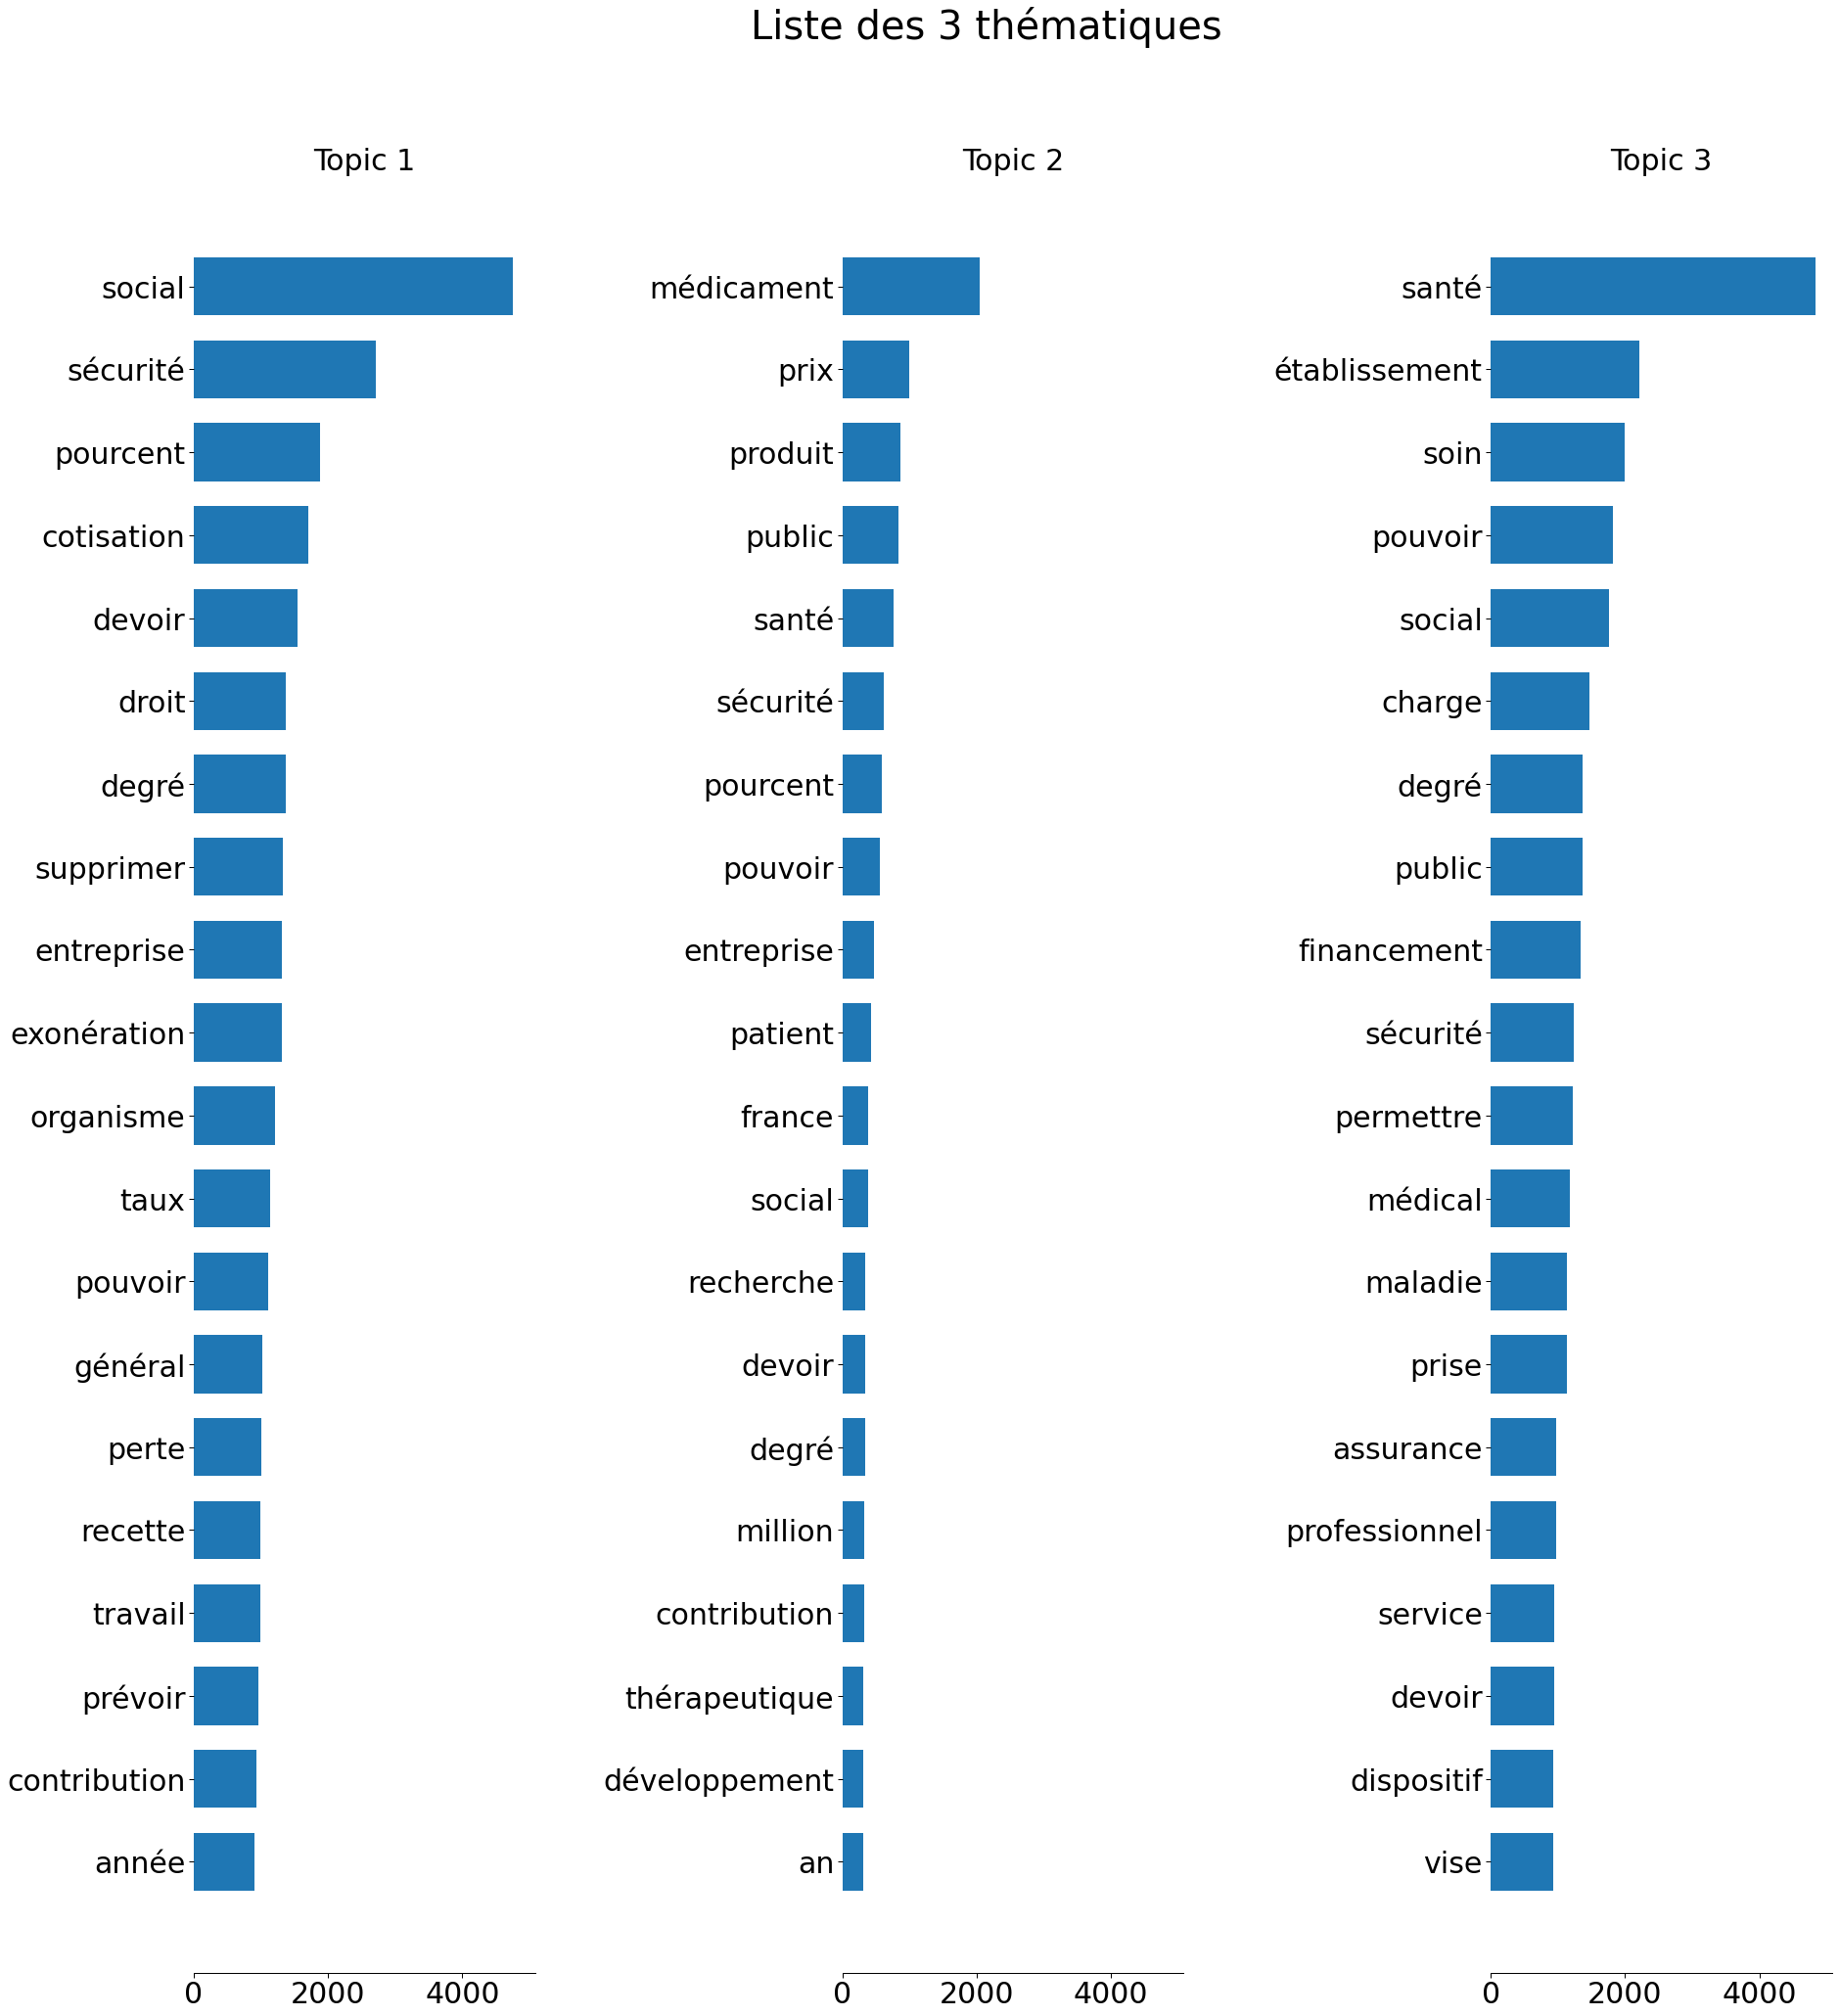

In [101]:
n_top_words = 20 #Nombre de mots caractéristiques affichés

import pickle
data_vectorized = pickle.load( open( "./data/amdt_data_vectorized.pickle", "rb" ) )
vectorizer = pickle.load( open( "./data/amdt_vectorizer.pickle", "rb" ) )
lda_Z = pickle.load( open( "./data/amdt_lda_Z.pickle", "rb" ) )
lda_model = pickle.load( open( "./data/amdt_lda_model.pickle", "rb" ) )


from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = lda_Z.shape[1]
len(vectorizer.get_feature_names())

import matplotlib.pyplot as plt
# code from https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=30)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    #Saving figure
    plt.savefig('graphs/Analyse_topics_{N}_mots.png'.format(N=NUM_TOPICS), bbox_inches = 'tight', facecolor='white')
    plt.show()

# Paramètres     
plot_top_words(lda_model, 
               vectorizer.get_feature_names(),
               n_top_words,
               'Liste des {N} thématiques'.format(N=NUM_TOPICS))


__CONCLUSION :__ 


Après analyse, on distingue 3 topics. Il semblerait que ces topics soient:

Topic 1 : __Les exonérations de cotisations sociales__

Topic 2 : __Le développement de médicaments et la recherche thérapeutique__

Topic 3 : __Le financement de la santé__

______________________________________________________________________________________________________________________

## [V_Conclusion](#V_Conclusion)

La conclusion de cette analyse est à réaliser ensemble.